In [ ]:
#Importing Libraries

In [1]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm


In [ ]:
#Extract Filenames from Folder

In [2]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [ ]:
#Importing ResNet50 Model and Cofiguration

In [5]:

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)  
x = GlobalMaxPool2D()(x)  
model = tf.keras.Model(inputs, x)


model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
#Extracting Fetaures from Image

In [6]:
img = image.load_img('16871.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


array([0.        , 0.00295299, 0.        , ..., 0.00752507, 0.02113524,
       0.0040174 ], dtype=float32)

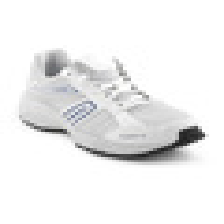

In [86]:
img = image.load_img('1571.jpg', target_size=(224,224))
img

In [8]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [9]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


array([0.        , 0.01761617, 0.00171608, ..., 0.01247239, 0.02726404,
       0.06899218], dtype=float32)

In [10]:

image_features = []
for file in tqdm(filenames):
    image_features.append(extract_features_from_images(file, model))
image_features


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[array([0.        , 0.01761617, 0.00171608, ..., 0.01247239, 0.02726404,
        0.06899218], dtype=float32),
 array([0.        , 0.03648943, 0.        , ..., 0.00997913, 0.02375535,
        0.04649905], dtype=float32),
 array([0.        , 0.03642146, 0.00710438, ..., 0.00140771, 0.        ,
        0.05435038], dtype=float32),
 array([0.00232165, 0.05030548, 0.00747743, ..., 0.00346684, 0.03391017,
        0.04565745], dtype=float32),
 array([0.00306835, 0.0624045 , 0.        , ..., 0.00170624, 0.02032885,
        0.05833261], dtype=float32),
 array([0.        , 0.1046912 , 0.0019809 , ..., 0.        , 0.03033772,
        0.02712848], dtype=float32),
 array([0.        , 0.1243846 , 0.01465613, ..., 0.00289705, 0.0405516 ,
        0.06534588], dtype=float32),
 array([0.        , 0.09169203, 0.0156991 , ..., 0.        , 0.0050358 ,
        0.0456004 ], dtype=float32),
 array([0.        , 0.09545277, 0.01153319, ..., 0.00073008, 0.04513266,
        0.07661069], dtype=float32),
 array([0.

In [11]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [12]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [13]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [14]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [15]:
np.array(Image_features).shape

(1000, 2048)

In [ ]:
#Finidng Simialar Images

In [74]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [75]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [76]:
input_image = extract_features_from_images('1571.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


In [77]:
distance,indices = neighbors.kneighbors([input_image])

In [78]:
indices[0]

array([ 83, 661,  81, 106,  37,  77], dtype=int64)

In [79]:
from IPython.display import Image

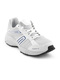

In [80]:
Image('1571.jpg')

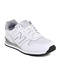

In [81]:
Image(filenames[indices[0][1]])

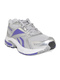

In [82]:
Image(filenames[indices[0][2]])

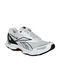

In [83]:
Image(filenames[indices[0][3]])

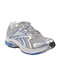

In [84]:
Image(filenames[indices[0][4]])

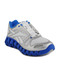

In [85]:
Image(filenames[indices[0][5]])